In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Titanic dataset
titanic_data = pd.read_csv('TitanicDataset.csv')

# Display the first few rows of the dataset
print(titanic_data.head())



   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [2]:
# missing values
print(titanic_data.isnull().sum())


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [3]:
# Check for missing values
print(titanic_data.isnull().sum())

# Handle missing 'Age' by filling with median
titanic_data['Age'].fillna(titanic_data['Age'].median(), inplace=True)

# Fill missing 'Embarked' with the mode (most common value)
titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0], inplace=True)

# Drop the 'Cabin' column due to too many missing values
titanic_data.drop('Cabin', axis=1, inplace=True)


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [4]:
#categorical trandformations
# Convert 'Sex' into numerical format (0 = female, 1 = male)
titanic_data['Sex'] = titanic_data['Sex'].map({'male': 1, 'female': 0})

# Convert 'Embarked' into numerical format using one-hot encoding
titanic_data = pd.get_dummies(titanic_data, columns=['Embarked'], drop_first=True)


In [5]:
# Drop unnecessary columns: 'PassengerId', 'Name', 'Ticket'
titanic_data.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)

# Check the cleaned dataset
print(titanic_data.head())


   Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked_Q  Embarked_S
0         0       3    1  22.0      1      0   7.2500           0           1
1         1       1    0  38.0      1      0  71.2833           0           0
2         1       3    0  26.0      0      0   7.9250           0           1
3         1       1    0  35.0      1      0  53.1000           0           1
4         0       3    1  35.0      0      0   8.0500           0           1


In [6]:
#visualization
#Univariate Analysis ( single variabe wala , because 'uni')

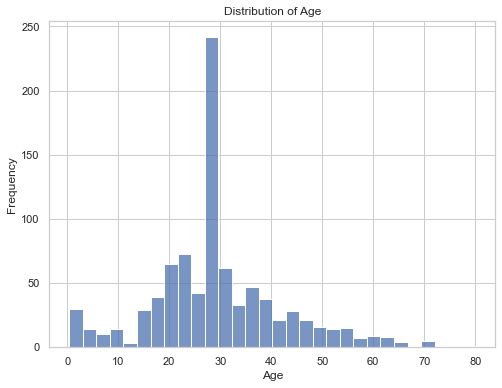

In [7]:
# Importing necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Set the plot style
sns.set(style="whitegrid")

# Plot histogram for 'Age'
plt.figure(figsize=(8, 6))
sns.histplot(titanic_data['Age'], bins=30, kde=False)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


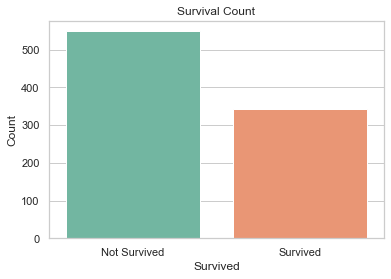

In [8]:
 # Countplot for Survival
plt.figure(figsize=(6, 4))
sns.countplot(x='Survived', data=titanic_data, palette='Set2')
plt.title('Survival Count')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.xticks([0, 1], ['Not Survived', 'Survived'])
plt.show()


In [9]:
#bivariate analysis

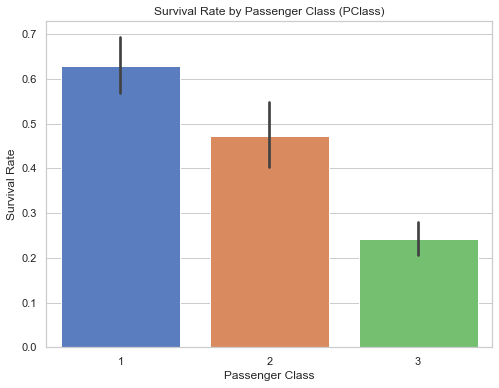

In [10]:
# Survival Rate by PClass
plt.figure(figsize=(8, 6))
sns.barplot(x='Pclass', y='Survived', data=titanic_data, palette='muted')
plt.title('Survival Rate by Passenger Class (PClass)')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.show()


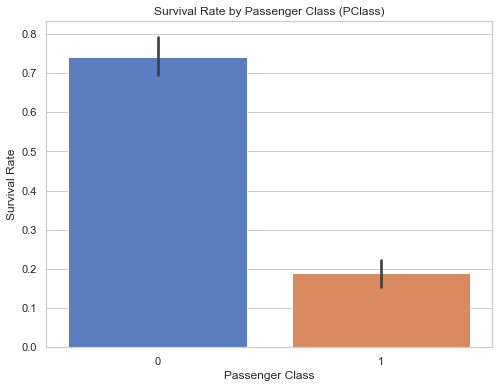

In [11]:
# Survival Rate by PClass
plt.figure(figsize=(8, 6))
sns.barplot(x='Sex', y='Survived', data=titanic_data, palette='muted')
plt.title('Survival Rate by Passenger Class (PClass)')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.show()

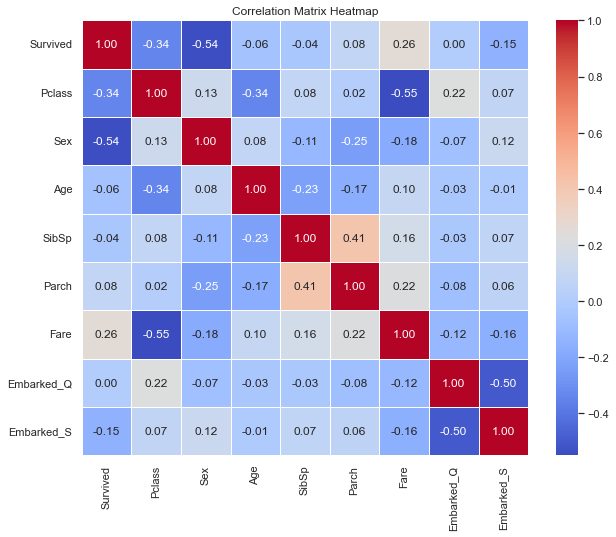

In [12]:
# Calculate the correlation matrix
corr_matrix = titanic_data.corr()

# Set the figure size
plt.figure(figsize=(10, 8))

# Create a heatmap for the correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')

# Set the title for the heatmap
plt.title('Correlation Matrix Heatmap')
plt.show()


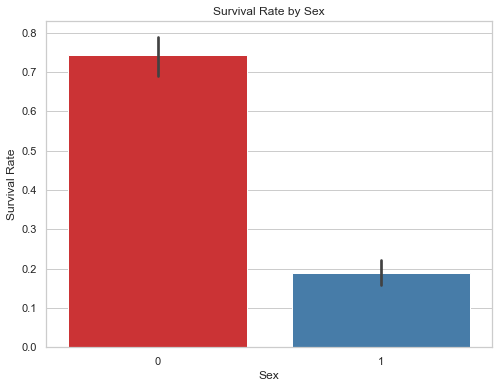

In [13]:
#survival  by sex analysis
# Plot Survival Rate by Sex
plt.figure(figsize=(8, 6))
sns.barplot(x='Sex', y='Survived', data=titanic_data, palette='Set1')
plt.title('Survival Rate by Sex')
plt.xlabel('Sex')
plt.ylabel('Survival Rate')
plt.show()
